# Final Project - Predicting survival of people with Heart Failure 

## Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.cluster import KMeans, DBSCAN

## Data Import


In [2]:
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Number of variables: 13

Types of variables: int64, float64

Redundant Variables: None

In [4]:
data.dropna(0)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [5]:
data.shape

(299, 13)

***There are no missing data, noise, outliers***


In [6]:
# statistic description for heart failure data
data.describe().transpose().round(2)

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.83,11.89,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.43,0.50,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.84,970.29,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.42,0.49,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.08,11.83,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.35,0.48,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.03,97804.24,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.39,1.03,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.63,4.41,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.65,0.48,0.0,0.0,1.0,1.0,1.0


[Text(0, 0.5, 'deaths'), Text(0.5, 0, 'age'), Text(0.5, 1.0, 'Age vs Death')]

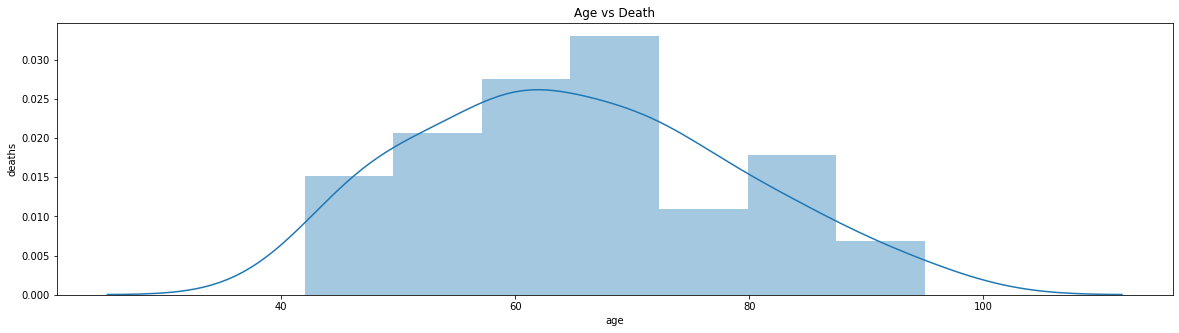

In [7]:
ax = sns.distplot(data[data['DEATH_EVENT'] == 1][['age']])
ax.figure.set_size_inches(20, 5)
ax.set(title = 'Age vs Death', xlabel = 'age', ylabel = 'deaths')

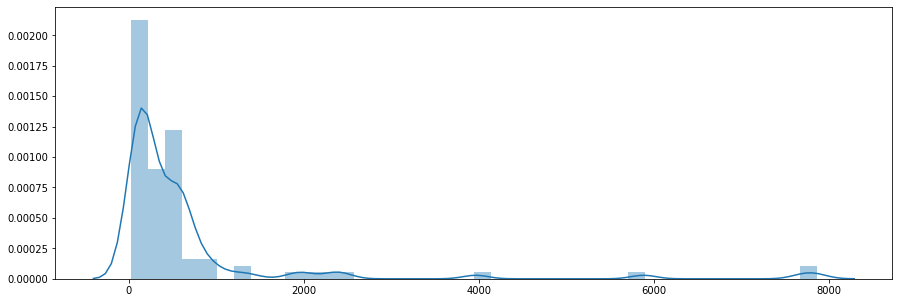

In [8]:
fig, axs = plt.subplots(1)
fig.set_size_inches(15, 5)
axs = sns.distplot(data[data['DEATH_EVENT'] == 1][['creatinine_phosphokinase']])

[Text(0, 0.5, 'deaths'),
 Text(0.5, 0, 'Platelets'),
 Text(0.5, 1.0, 'Platelets vs Death')]

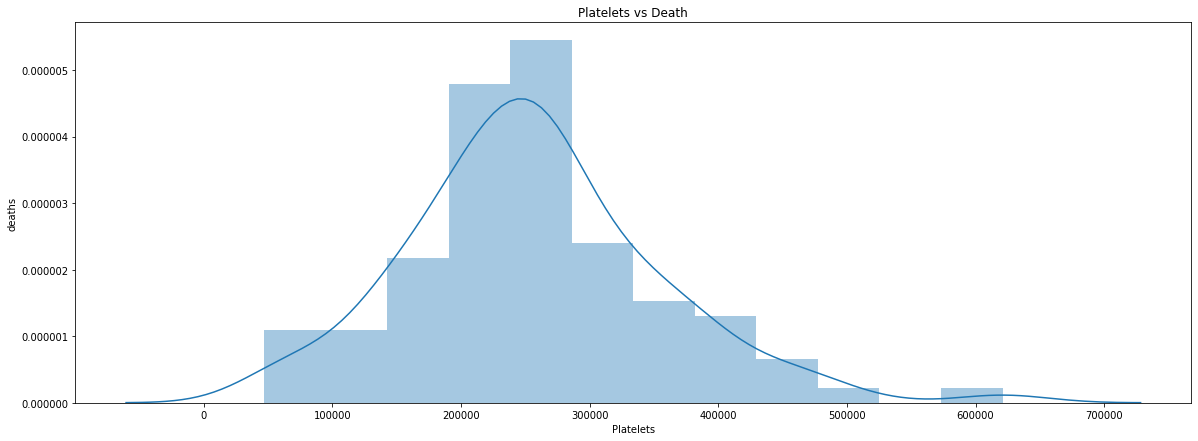

In [9]:
ax = sns.distplot(data[data['DEATH_EVENT'] == 1][['platelets']])
ax.figure.set_size_inches(20, 7)
ax.set(title = 'Platelets vs Death', xlabel = 'Platelets', ylabel = 'deaths')

[Text(0, 0.5, 'deaths'),
 Text(0.5, 0, 'Serum Creatinine'),
 Text(0.5, 1.0, 'Serum Creatinine vs Death')]

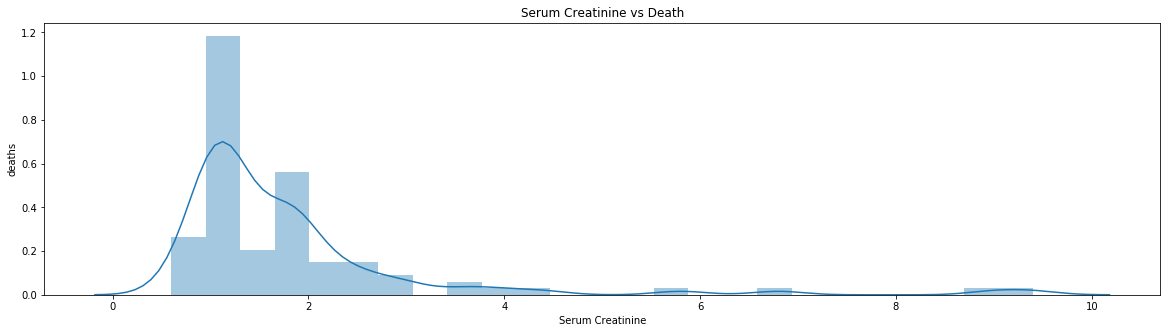

In [10]:
ax = sns.distplot(data[data['DEATH_EVENT'] == 1][['serum_creatinine']])
ax.figure.set_size_inches(20, 5)
ax.set(title = 'Serum Creatinine vs Death', xlabel = 'Serum Creatinine', ylabel = 'deaths')

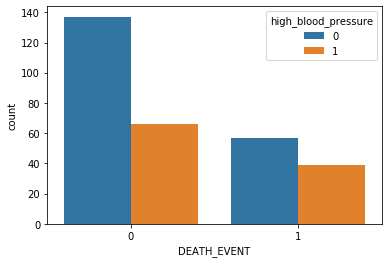

In [11]:
sns.countplot(x = 'DEATH_EVENT', hue = 'high_blood_pressure', data = data)

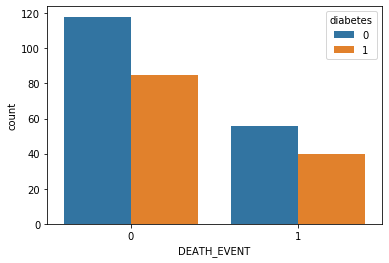

In [12]:
sns.countplot(x = 'DEATH_EVENT', hue = 'diabetes', data = data)

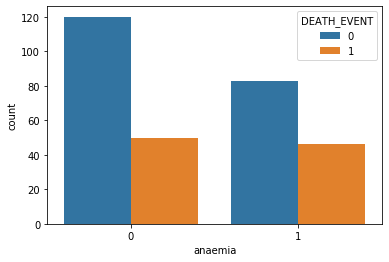

In [13]:
sns.countplot(x = 'anaemia', hue = 'DEATH_EVENT', data = data)

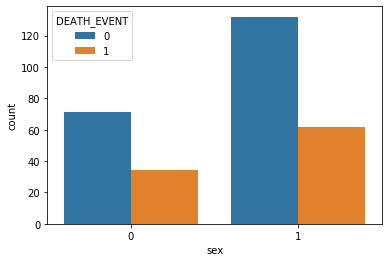

In [14]:
sns.countplot(x = 'sex', hue = 'DEATH_EVENT', data = data)

## Data Preparation

In [15]:
X_train, X_val, y_train, y_val = train_test_split(data.iloc[:,:-1], data.iloc[:, [-1]], test_size = 0.25, random_state = 0)
# X_train, X_val, y_train, y_val = train_test_split(data.iloc[:,:12], data.iloc[:, 12:], test_size = 0.25, random_state = 0)

In [16]:
scaler = StandardScaler()
scaler.fit(X_train)
x_train_scaled = scaler.transform(X_train)
x_val_scaled = scaler.transform(X_val)
# x_val = X_val.select_dtypes(include=[np.int64,np.float64])
x_train_scaled_df = pd.DataFrame(x_train_scaled,index = X_train.index,columns=X_train.columns)
x_val_scaled_df = pd.DataFrame(x_val_scaled,index = X_val.index,columns=X_val.columns)

## Classification

### 1: Decision Tree
#### 1.1: Using all predictor variables

In [17]:
classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(x_train_scaled, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [18]:
y_pred = classifier.predict(x_val_scaled)

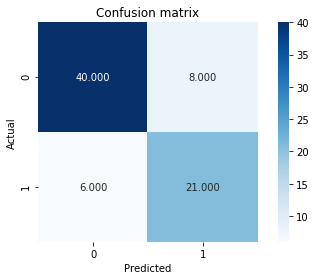

In [19]:
conf_matrix = metrics.confusion_matrix(y_val, y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [20]:
accuracy = metrics.accuracy_score(y_val, y_pred)
print("Accuracy: ", accuracy)
error = 1 - accuracy
print("Error: ", error)
precision = metrics.precision_score(y_val, y_pred)
print("Precision: ", precision)
recall = metrics.recall_score(y_val, y_pred)
print("Recall: ", recall)
F1_score = metrics.f1_score(y_val, y_pred)
print("F1 score: ", F1_score)


Accuracy:  0.8133333333333334
Error:  0.18666666666666665
Precision:  0.7241379310344828
Recall:  0.7777777777777778
F1 score:  0.75


#### 1.2: Using Age and Gender as predictor variables

In [21]:
selected_predictor_variables = ['age', 
                                'sex']

In [22]:
classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(x_train_scaled_df[selected_predictor_variables], y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [23]:
y_pred = classifier.predict(x_val_scaled_df[selected_predictor_variables])

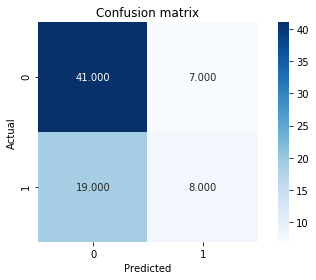

In [24]:
conf_matrix = metrics.confusion_matrix(y_val, y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [25]:
accuracy = metrics.accuracy_score(y_val, y_pred)
print("Accuracy: ", accuracy)
error = 1 - accuracy
print("Error: ", error)
precision = metrics.precision_score(y_val, y_pred)
print("Precision: ", precision)
recall = metrics.recall_score(y_val, y_pred)
print("Recall: ", recall)
F1_score = metrics.f1_score(y_val, y_pred)
print("F1 score: ", F1_score)

Accuracy:  0.6533333333333333
Error:  0.3466666666666667
Precision:  0.5333333333333333
Recall:  0.2962962962962963
F1 score:  0.38095238095238093


#### 1.3: Using Diabetes, High Blood Pressure and anaemia, platelets, smoking as predictor variables

In [26]:
# print(data.head())
selected_predictor_variables = ['anaemia', 
                                'diabetes',
                               'platelets', 'high_blood_pressure', 'smoking']

In [27]:
classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(x_train_scaled_df[selected_predictor_variables], y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [28]:
y_pred = classifier.predict(x_val_scaled_df[selected_predictor_variables])


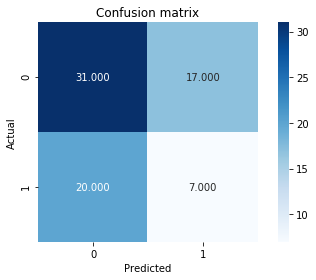

In [29]:
conf_matrix = metrics.confusion_matrix(y_val, y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [30]:
accuracy = metrics.accuracy_score(y_val, y_pred)
print("Accuracy: ", accuracy)
error = 1 - accuracy
print("Error: ", error)
precision = metrics.precision_score(y_val, y_pred)
print("Precision: ", precision)
recall = metrics.recall_score(y_val, y_pred)
print("Recall: ", recall)
F1_score = metrics.f1_score(y_val, y_pred)
print("F1 score: ", F1_score)

Accuracy:  0.5066666666666667
Error:  0.4933333333333333
Precision:  0.2916666666666667
Recall:  0.25925925925925924
F1 score:  0.27450980392156865


#### 1.4: Using creatinine_phosphokinase,  serum_creatinine, serum_sodium and ejection_fraction as predictor variables

In [31]:
selected_predictor_variables = ['creatinine_phosphokinase', 
                                'serum_creatinine',
                               'serum_sodium',
                               'ejection_fraction']

In [32]:
classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(x_train_scaled_df[selected_predictor_variables], y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [33]:
y_pred = classifier.predict(x_val_scaled_df[selected_predictor_variables])

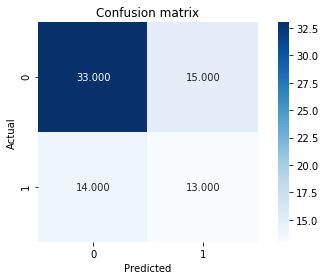

In [34]:
conf_matrix = metrics.confusion_matrix(y_val, y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [35]:
accuracy = metrics.accuracy_score(y_val, y_pred)
print("Accuracy: ", accuracy)
error = 1 - accuracy
print("Error: ", error)
precision = metrics.precision_score(y_val, y_pred)
print("Precision: ", precision)
recall = metrics.recall_score(y_val, y_pred)
print("Recall: ", recall)
F1_score = metrics.f1_score(y_val, y_pred)
print("F1 score: ", F1_score)

Accuracy:  0.6133333333333333
Error:  0.3866666666666667
Precision:  0.4642857142857143
Recall:  0.48148148148148145
F1 score:  0.4727272727272727


#### 1.5: Using serum_creatinine and ejection_fraction as predictor variables

In [36]:
selected_predictor_variables = ['serum_creatinine',
                               'ejection_fraction']

In [37]:
classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(x_train_scaled_df[selected_predictor_variables], y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [38]:
y_pred = classifier.predict(x_val_scaled_df[selected_predictor_variables])

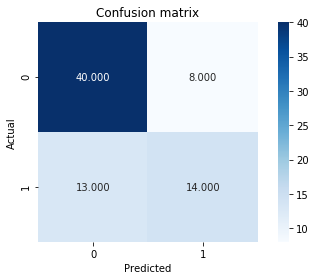

In [39]:
conf_matrix = metrics.confusion_matrix(y_val, y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [40]:
accuracy = metrics.accuracy_score(y_val, y_pred)
print("Accuracy: ", accuracy)
error = 1 - accuracy
print("Error: ", error)
precision = metrics.precision_score(y_val, y_pred)
print("Precision: ", precision)
recall = metrics.recall_score(y_val, y_pred)
print("Recall: ", recall)
F1_score = metrics.f1_score(y_val, y_pred)
print("F1 score: ", F1_score)

Accuracy:  0.72
Error:  0.28
Precision:  0.6363636363636364
Recall:  0.5185185185185185
F1 score:  0.5714285714285714


# 2) K Nearest Neighbors

#### 2.1: Using all predictor variables

In [41]:
classifier = KNeighborsClassifier(n_neighbors=3)  
classifier.fit(x_train_scaled, y_train)

/home/ashwin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [42]:
y_pred = classifier.predict(x_val_scaled)

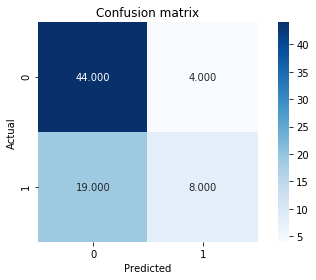

In [43]:
conf_matrix = metrics.confusion_matrix(y_val, y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [44]:
accuracy = metrics.accuracy_score(y_val, y_pred)
print("Accuracy: ", accuracy)
error = 1 - accuracy
print("Error: ", error)
precision = metrics.precision_score(y_val, y_pred)
print("Precision: ", precision)
recall = metrics.recall_score(y_val, y_pred)
print("Recall: ", recall)
F1_score = metrics.f1_score(y_val, y_pred)
print("F1 score: ", F1_score)


Accuracy:  0.6933333333333334
Error:  0.30666666666666664
Precision:  0.6666666666666666
Recall:  0.2962962962962963
F1 score:  0.41025641025641024


#### 2.2: Using Age and Gender Variables

In [45]:
selected_predictor_variables = ['age', 
                                'sex']

In [46]:
classifier = KNeighborsClassifier(n_neighbors=3)  
classifier.fit(x_train_scaled_df[selected_predictor_variables], y_train)

/home/ashwin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [47]:
y_pred = classifier.predict(x_val_scaled_df[selected_predictor_variables])

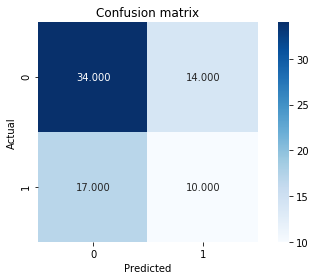

In [48]:
conf_matrix = metrics.confusion_matrix(y_val, y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [49]:
accuracy = metrics.accuracy_score(y_val, y_pred)
print("Accuracy: ", accuracy)
error = 1 - accuracy
print("Error: ", error)
precision = metrics.precision_score(y_val, y_pred)
print("Precision: ", precision)
recall = metrics.recall_score(y_val, y_pred)
print("Recall: ", recall)
F1_score = metrics.f1_score(y_val, y_pred)
print("F1 score: ", F1_score)


Accuracy:  0.5866666666666667
Error:  0.41333333333333333
Precision:  0.4166666666666667
Recall:  0.37037037037037035
F1 score:  0.39215686274509803


#### 2.3: Using Diabetes, High Blood Pressure and anaemia, platelets, smoking as predictor variables

In [50]:
selected_predictor_variables = ['anaemia', 
                                'diabetes',
                               'platelets', 'high_blood_pressure', 'smoking']

In [51]:
classifier = KNeighborsClassifier(n_neighbors=3)  
classifier.fit(x_train_scaled_df[selected_predictor_variables], y_train)

/home/ashwin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [52]:
y_pred = classifier.predict(x_val_scaled_df[selected_predictor_variables])

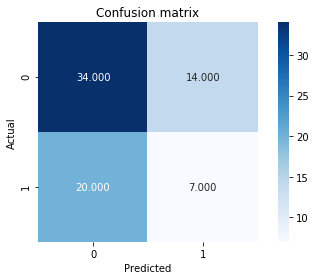

In [53]:
conf_matrix = metrics.confusion_matrix(y_val, y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [54]:
accuracy = metrics.accuracy_score(y_val, y_pred)
print("Accuracy: ", accuracy)
error = 1 - accuracy
print("Error: ", error)
precision = metrics.precision_score(y_val, y_pred)
print("Precision: ", precision)
recall = metrics.recall_score(y_val, y_pred)
print("Recall: ", recall)
F1_score = metrics.f1_score(y_val, y_pred)
print("F1 score: ", F1_score)

Accuracy:  0.5466666666666666
Error:  0.45333333333333337
Precision:  0.3333333333333333
Recall:  0.25925925925925924
F1 score:  0.2916666666666667


#### 2.4: Using creatinine_phosphokinase,  serum_creatinine, serum_sodium and ejection_fraction as predictor variables

In [55]:
selected_predictor_variables = ['creatinine_phosphokinase', 
                                'serum_creatinine',
                               'serum_sodium',
                               'ejection_fraction']

In [56]:
classifier = KNeighborsClassifier(n_neighbors=3)  
classifier.fit(x_train_scaled_df[selected_predictor_variables], y_train)

/home/ashwin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [57]:
y_pred = classifier.predict(x_val_scaled_df[selected_predictor_variables])

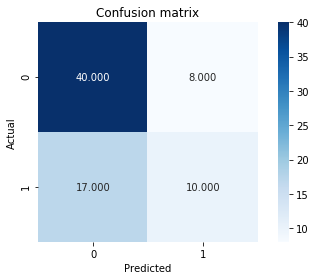

In [58]:
conf_matrix = metrics.confusion_matrix(y_val, y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [59]:
accuracy = metrics.accuracy_score(y_val, y_pred)
print("Accuracy: ", accuracy)
error = 1 - accuracy
print("Error: ", error)
precision = metrics.precision_score(y_val, y_pred)
print("Precision: ", precision)
recall = metrics.recall_score(y_val, y_pred)
print("Recall: ", recall)
F1_score = metrics.f1_score(y_val, y_pred)
print("F1 score: ", F1_score)

Accuracy:  0.6666666666666666
Error:  0.33333333333333337
Precision:  0.5555555555555556
Recall:  0.37037037037037035
F1 score:  0.4444444444444445


#### 2.5: Using serum_creatinine and ejection_fraction as predictor variables

In [60]:
selected_predictor_variables = ['serum_creatinine',
                               'ejection_fraction']

In [61]:
classifier_k_nearest = KNeighborsClassifier(n_neighbors=3)
classifier_k_nearest.fit(x_train_scaled_df[selected_predictor_variables], y_train)

/home/ashwin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [62]:
y_pred = classifier_k_nearest.predict(x_val_scaled_df[selected_predictor_variables])

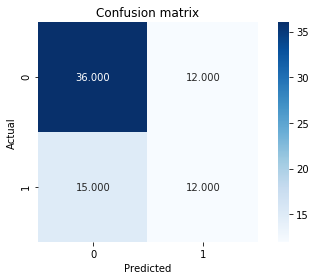

In [63]:
conf_matrix = metrics.confusion_matrix(y_val, y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [64]:
accuracy = metrics.accuracy_score(y_val, y_pred)
print("Accuracy: ", accuracy)
error = 1 - accuracy
print("Error: ", error)
precision = metrics.precision_score(y_val, y_pred)
print("Precision: ", precision)
recall = metrics.recall_score(y_val, y_pred)
print("Recall: ", recall)
F1_score = metrics.f1_score(y_val, y_pred)
print("F1 score: ", F1_score)

Accuracy:  0.64
Error:  0.36
Precision:  0.5
Recall:  0.4444444444444444
F1 score:  0.47058823529411764


# 3) Naive Bayes

#### 3.1: Using all predictor variables

In [65]:
classifier = GaussianNB() 
classifier.fit(x_train_scaled, y_train)

/home/ashwin/anaconda3/lib/python3.7/site-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [66]:
y_pred = classifier.predict(x_val_scaled)

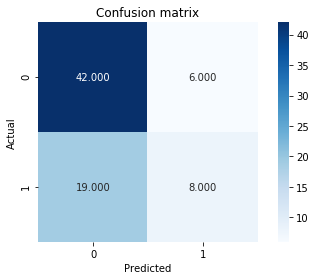

In [67]:
conf_matrix = metrics.confusion_matrix(y_val, y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [68]:
accuracy = metrics.accuracy_score(y_val, y_pred)
print("Accuracy: ", accuracy)
error = 1 - accuracy
print("Error: ", error)
precision = metrics.precision_score(y_val, y_pred)
print("Precision: ", precision)
recall = metrics.recall_score(y_val, y_pred)
print("Recall: ", recall)
F1_score = metrics.f1_score(y_val, y_pred)
print("F1 score: ", F1_score)


Accuracy:  0.6666666666666666
Error:  0.33333333333333337
Precision:  0.5714285714285714
Recall:  0.2962962962962963
F1 score:  0.3902439024390244


#### 3.2: Using Age and Gender Variables

In [69]:
selected_predictor_variables = ['age', 
                                'sex']

In [70]:
classifier = GaussianNB() 
classifier.fit(x_train_scaled_df[selected_predictor_variables], y_train)

/home/ashwin/anaconda3/lib/python3.7/site-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [71]:
y_pred = classifier.predict(x_val_scaled_df[selected_predictor_variables])

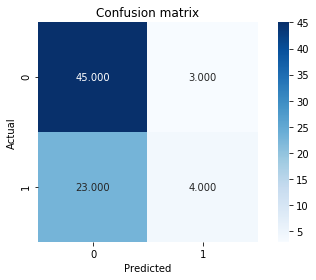

In [72]:
conf_matrix = metrics.confusion_matrix(y_val, y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [73]:
accuracy = metrics.accuracy_score(y_val, y_pred)
print("Accuracy: ", accuracy)
error = 1 - accuracy
print("Error: ", error)
precision = metrics.precision_score(y_val, y_pred)
print("Precision: ", precision)
recall = metrics.recall_score(y_val, y_pred)
print("Recall: ", recall)
F1_score = metrics.f1_score(y_val, y_pred)
print("F1 score: ", F1_score)


Accuracy:  0.6533333333333333
Error:  0.3466666666666667
Precision:  0.5714285714285714
Recall:  0.14814814814814814
F1 score:  0.23529411764705882


#### 3.3: Using Diabetes, High Blood Pressure and anaemia, platelets, smoking as predictor variables

In [74]:
selected_predictor_variables = ['anaemia', 
                                'diabetes',
                               'platelets', 'high_blood_pressure', 'smoking']

In [75]:
classifier = GaussianNB() 
classifier.fit(x_train_scaled_df[selected_predictor_variables], y_train)

/home/ashwin/anaconda3/lib/python3.7/site-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [76]:
y_pred = classifier.predict(x_val_scaled_df[selected_predictor_variables])

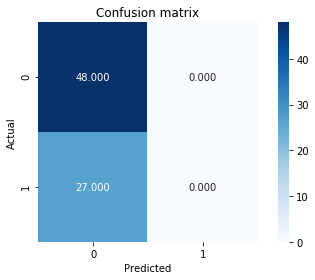

In [77]:
conf_matrix = metrics.confusion_matrix(y_val, y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [78]:
accuracy = metrics.accuracy_score(y_val, y_pred)
print("Accuracy: ", accuracy)
error = 1 - accuracy
print("Error: ", error)
precision = metrics.precision_score(y_val, y_pred)
print("Precision: ", precision)
recall = metrics.recall_score(y_val, y_pred)
print("Recall: ", recall)
F1_score = metrics.f1_score(y_val, y_pred)
print("F1 score: ", F1_score)

Accuracy:  0.64
Error:  0.36
Precision:  0.0
Recall:  0.0
F1 score:  0.0


/home/ashwin/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### 3.4: Using creatinine_phosphokinase,  serum_creatinine, serum_sodium and ejection_fraction as predictor variables

In [79]:
selected_predictor_variables = ['creatinine_phosphokinase', 
                                'serum_creatinine',
                               'serum_sodium',
                               'ejection_fraction']

In [80]:
classifier = GaussianNB() 
classifier.fit(x_train_scaled_df[selected_predictor_variables], y_train)

/home/ashwin/anaconda3/lib/python3.7/site-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [81]:
y_pred = classifier.predict(x_val_scaled_df[selected_predictor_variables])

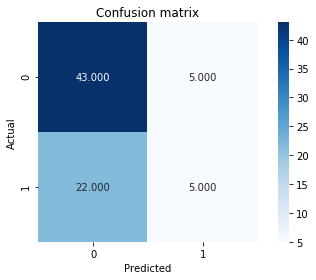

In [82]:
conf_matrix = metrics.confusion_matrix(y_val, y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [83]:
accuracy = metrics.accuracy_score(y_val, y_pred)
print("Accuracy: ", accuracy)
error = 1 - accuracy
print("Error: ", error)
precision = metrics.precision_score(y_val, y_pred)
print("Precision: ", precision)
recall = metrics.recall_score(y_val, y_pred)
print("Recall: ", recall)
F1_score = metrics.f1_score(y_val, y_pred)
print("F1 score: ", F1_score)

Accuracy:  0.64
Error:  0.36
Precision:  0.5
Recall:  0.18518518518518517
F1 score:  0.2702702702702703


#### 3.5: Using serum_creatinine and ejection_fraction as predictor variables

In [84]:
selected_predictor_variables = ['serum_creatinine',
                               'ejection_fraction']

In [85]:
classifier = GaussianNB() 
classifier.fit(x_train_scaled_df[selected_predictor_variables], y_train)

/home/ashwin/anaconda3/lib/python3.7/site-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [86]:
y_pred = classifier.predict(x_val_scaled_df[selected_predictor_variables])

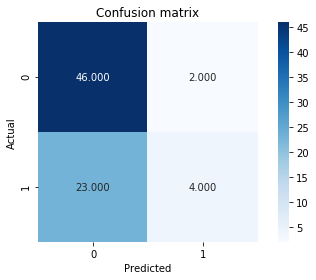

In [87]:
conf_matrix = metrics.confusion_matrix(y_val, y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [88]:
accuracy = metrics.accuracy_score(y_val, y_pred)
print("Accuracy: ", accuracy)
error = 1 - accuracy
print("Error: ", error)
precision = metrics.precision_score(y_val, y_pred)
print("Precision: ", precision)
recall = metrics.recall_score(y_val, y_pred)
print("Recall: ", recall)
F1_score = metrics.f1_score(y_val, y_pred)
print("F1 score: ", F1_score)

Accuracy:  0.6666666666666666
Error:  0.33333333333333337
Precision:  0.6666666666666666
Recall:  0.14814814814814814
F1 score:  0.24242424242424243


# 4) Support Vector Machine 

#### 4.1: Using all predictor variables

In [89]:
classifier = SVC(kernel='rbf')  
classifier.fit(x_train_scaled, y_train)

/home/ashwin/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [90]:
y_pred = classifier.predict(x_val_scaled)

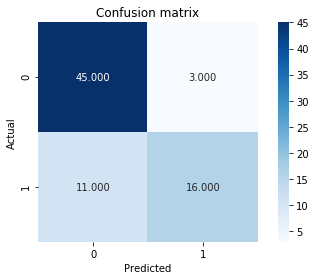

In [91]:
conf_matrix = metrics.confusion_matrix(y_val, y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [92]:
accuracy = metrics.accuracy_score(y_val, y_pred)
print("Accuracy: ", accuracy)
error = 1 - accuracy
print("Error: ", error)
precision = metrics.precision_score(y_val, y_pred)
print("Precision: ", precision)
recall = metrics.recall_score(y_val, y_pred)
print("Recall: ", recall)
F1_score = metrics.f1_score(y_val, y_pred)
print("F1 score: ", F1_score)

Accuracy:  0.8133333333333334
Error:  0.18666666666666665
Precision:  0.8421052631578947
Recall:  0.5925925925925926
F1 score:  0.6956521739130435


#### 4.2: Using Age and Gender Variables

In [93]:
selected_predictor_variables = ['age', 
                                'sex']

In [94]:
classifier = SVC(kernel='rbf')  
classifier.fit(x_train_scaled_df[selected_predictor_variables], y_train)

/home/ashwin/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [95]:
y_pred = classifier.predict(x_val_scaled_df[selected_predictor_variables])

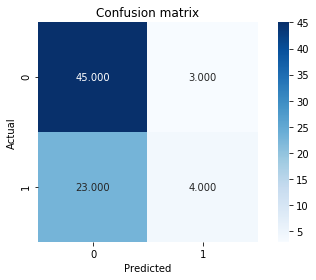

In [96]:
conf_matrix = metrics.confusion_matrix(y_val, y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [97]:
accuracy = metrics.accuracy_score(y_val, y_pred)
print("Accuracy: ", accuracy)
error = 1 - accuracy
print("Error: ", error)
precision = metrics.precision_score(y_val, y_pred)
print("Precision: ", precision)
recall = metrics.recall_score(y_val, y_pred)
print("Recall: ", recall)
F1_score = metrics.f1_score(y_val, y_pred)
print("F1 score: ", F1_score)

Accuracy:  0.6533333333333333
Error:  0.3466666666666667
Precision:  0.5714285714285714
Recall:  0.14814814814814814
F1 score:  0.23529411764705882


#### 4.3: Using Diabetes, High Blood Pressure and anaemia, platelets, smoking as predictor variables

In [98]:
selected_predictor_variables = ['anaemia', 
                                'diabetes',
                               'platelets', 'high_blood_pressure', 'smoking']

In [99]:
classifier = SVC(kernel='rbf')  
classifier.fit(x_train_scaled_df[selected_predictor_variables], y_train)

/home/ashwin/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [100]:
y_pred = classifier.predict(x_val_scaled_df[selected_predictor_variables])

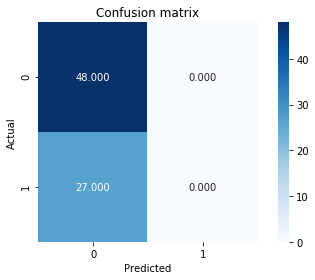

In [101]:
conf_matrix = metrics.confusion_matrix(y_val, y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [102]:
accuracy = metrics.accuracy_score(y_val, y_pred)
print("Accuracy: ", accuracy)
error = 1 - accuracy
print("Error: ", error)
precision = metrics.precision_score(y_val, y_pred)
print("Precision: ", precision)
recall = metrics.recall_score(y_val, y_pred)
print("Recall: ", recall)
F1_score = metrics.f1_score(y_val, y_pred)
print("F1 score: ", F1_score)

Accuracy:  0.64
Error:  0.36
Precision:  0.0
Recall:  0.0
F1 score:  0.0


/home/ashwin/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### 4.4: Using creatinine_phosphokinase,  serum_creatinine, serum_sodium and ejection_fraction as predictor variables

In [103]:
selected_predictor_variables = ['creatinine_phosphokinase', 
                                'serum_creatinine',
                               'serum_sodium',
                               'ejection_fraction']

In [104]:
classifier = SVC(kernel='rbf')  
classifier.fit(x_train_scaled_df[selected_predictor_variables], y_train)

/home/ashwin/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [105]:
y_pred = classifier.predict(x_val_scaled_df[selected_predictor_variables])

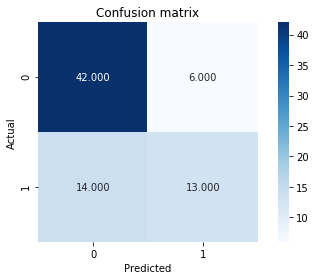

In [106]:
conf_matrix = metrics.confusion_matrix(y_val, y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [107]:
accuracy = metrics.accuracy_score(y_val, y_pred)
print("Accuracy: ", accuracy)
error = 1 - accuracy
print("Error: ", error)
precision = metrics.precision_score(y_val, y_pred)
print("Precision: ", precision)
recall = metrics.recall_score(y_val, y_pred)
print("Recall: ", recall)
F1_score = metrics.f1_score(y_val, y_pred)
print("F1 score: ", F1_score)

Accuracy:  0.7333333333333333
Error:  0.2666666666666667
Precision:  0.6842105263157895
Recall:  0.48148148148148145
F1 score:  0.5652173913043478


#### 4.5: Using serum_creatinine and ejection_fraction as predictor variables

In [108]:
selected_predictor_variables = ['serum_creatinine',
                               'ejection_fraction']

In [109]:
classifier = SVC(kernel='rbf')  
classifier.fit(x_train_scaled_df[selected_predictor_variables], y_train)

/home/ashwin/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [110]:
y_pred = classifier.predict(x_val_scaled_df[selected_predictor_variables])

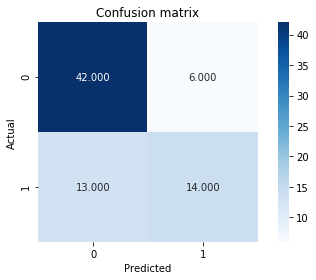

In [111]:
conf_matrix = metrics.confusion_matrix(y_val, y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [112]:
accuracy = metrics.accuracy_score(y_val, y_pred)
print("Accuracy: ", accuracy)
error = 1 - accuracy
print("Error: ", error)
precision = metrics.precision_score(y_val, y_pred)
print("Precision: ", precision)
recall = metrics.recall_score(y_val, y_pred)
print("Recall: ", recall)
F1_score = metrics.f1_score(y_val, y_pred)
print("F1 score: ", F1_score)

Accuracy:  0.7466666666666667
Error:  0.2533333333333333
Precision:  0.7
Recall:  0.5185185185185185
F1 score:  0.5957446808510639


### Classification: Model Performances
* **Decision Tree**

|                  Variables                                                      | Accuracy | Precision | Recall | F1 Score |
|:-------------------------------------------------------------------------------:|:--------:|:---------:|:------:|:--------:|
|                     All                                                         |   0.81   |    0.72   |  0.78  |   0.75   |
|                Age & Gender                                                     |   0.65   |    0.53   |  0.30  |   0.38   |
|     Diabetes, High BP, Platelets, Anaemia & Smoking                             |   0.51   |    0.29   |  0.26  |   0.27   |
| creatinine_phosphokinase, serum_creatinine,serum_sodium and ejection_fraction   |   0.61   |    0.46   |  0.48  |   0.47   | 
|    serum_sodium and ejection_fraction                                           |   0.72   |    0.64   |  0.52  |   0.57   |

* **K Nearest Neighbors**

|                  Variables                                                      | Accuracy | Precision | Recall | F1 Score |
|:-------------------------------------------------------------------------------:|:--------:|:---------:|:------:|:--------:|
|                     All                                                         |   0.69   |    0.67   |  0.30  |   0.41   |
|                Age & Gender                                                     |   0.59   |    0.42   |  0.37  |   0.39   |
|     Diabetes, High BP, Platelets, Anaemia & Smoking                             |   0.55   |    0.33   |  0.26  |   0.29   |
| creatinine_phosphokinase, serum_creatinine,serum_sodium and ejection_fraction   |   0.67   |    0.56   |  0.37  |   0.44   | 
|    serum_sodium and ejection_fraction                                           |   0.64   |    0.50   |  0.44  |   0.47   |


* **Naive Bayes** 

|                  Variables                                                      | Accuracy | Precision | Recall | F1 Score |
|:-------------------------------------------------------------------------------:|:--------:|:---------:|:------:|:--------:|
|                     All                                                         |   0.67   |    0.57   |  0.30  |   0.39   |
|                Age & Gender                                                     |   0.65   |    0.57   |  0.15  |   0.24   |
|     Diabetes, High BP, Platelets, Anaemia & Smoking                             |   0.64   |    0.00   |  0.00  |   0.00   |
| creatinine_phosphokinase, serum_creatinine,serum_sodium and ejection_fraction   |   0.64   |    0.50   |  0.19  |    0.27  | 
|    serum_sodium and ejection_fraction                                           |   0.67   |    0.67   |  0.15  |    0.24  |


* **Support Vector Machines** 

|                  Variables                                                      | Accuracy | Precision | Recall | F1 Score |
|:-------------------------------------------------------------------------------:|:--------:|:---------:|:------:|:--------:|
|                     All                                                         |   0.81   |    0.84   |  0.59  |   0.70   |
|                Age & Gender                                                     |   0.65   |    0.57   |  0.15  |   0.24   |
|     Diabetes, High BP, Platelets, Anaemia & Smoking                             |   0.64   |    0.00   |  0.00  |   0.00   |
| creatinine_phosphokinase, serum_creatinine,serum_sodium and ejection_fraction   |   0.73   |    0.68   |  0.48  |    0.57  | 
|    serum_sodium and ejection_fraction                                           |   0.75   |    0.70   |  0.52  |    0.60  |


**Best performing classification model**

Decision Tree using all predictor variables gives the best F1 Score


**The performance of the model**
* Accuracy: 0.81
* Precision: 0.72
* Recall: 0.78
* F1 Score: 0.75

**Selection of the parameters of the model**

* Upon trial of many different combinations we understand that few group of variables do not contribute to the best performance of a model. So we chose all predictor variables for the classification as they give the best F1 score and performance.


In [113]:
# Best performing classifiers & variables\n",
# (DecisionTreeClassifier(criterion='entropy', random_state=0), ('age', 'anaemia', 'creatinine_phosphokinase', 'platelets', 'serum_creatinine', 'serum_sodium', 'smoking', 'time'))\n",
# (DecisionTreeClassifier(criterion='entropy', random_state=0), ('age', 'creatinine_phosphokinase', 'diabetes', 'platelets', 'serum_creatinine', 'serum_sodium', 'smoking', 'time'))\n",
# (DecisionTreeClassifier(criterion='entropy', random_state=0), ('creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'smoking', 'time'))\n",
# (DecisionTreeClassifier(criterion='entropy', random_state=0), ('ejection_fraction', 'serum_creatinine', 'serum_sodium', 'time'))\n",
# (DecisionTreeClassifier(criterion='entropy', random_state=0), ('ejection_fraction', 'high_blood_pressure', 'serum_creatinine', 'serum_sodium', 'time'))"

# 5 Clustering

In [114]:
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')
data.head()

x_train = data.iloc[:, :-1]
y_train = data.iloc[:, -1].to_numpy().flatten()

scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_train_scaled_df = pd.DataFrame(x_train_scaled, index=x_train.index, columns=x_train.columns)

Following are the two true clusters based on "Serum Creatinine" and "Ejection Fraction"

[Text(0, 0.5, 'ejection_fraction'),
 Text(0.5, 0, 'serum_creatinine'),
 Text(0.5, 1.0, 'serum_creatinine vs ejection_fraction')]

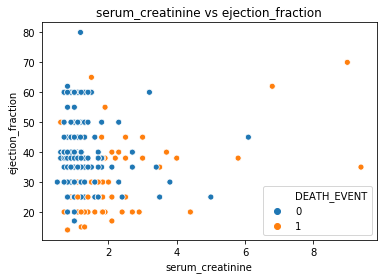

In [115]:
# clustering = linkage(all_x, method = "single", metric = "euclidean")
# clusters = fcluster(clustering, 2, criterion = 'maxclust')
col1 = 'serum_creatinine'
col2 = 'ejection_fraction'
ax = sns.scatterplot(data=data, x=col1, y=col2, hue='DEATH_EVENT')
ax.set(title = '{} vs {}'.format(col1, col2), xlabel = col1, ylabel = col2)

## 5.1 Hierarchical Clustering - Single Linkage

### 5.1.1 All variables

In [116]:
all_x = x_train_scaled_df.to_numpy()

In [117]:
clustering = linkage(all_x, method="single", metric = "euclidean")
clusters = fcluster(clustering, 2, criterion = 'maxclust')

In [118]:
adjusted_rand_index = metrics.adjusted_rand_score(y_train, clusters)
silhouette_coefficient = metrics.silhouette_score(all_x, clusters, metric = "euclidean")
print([adjusted_rand_index, silhouette_coefficient])

[0.007441167976633384, 0.41639364203172197]


[Text(0, 0.5, 'ejection_fraction'),
 Text(0.5, 0, 'serum_creatinine'),
 Text(0.5, 1.0, 'serum_creatinine vs ejection_fraction')]

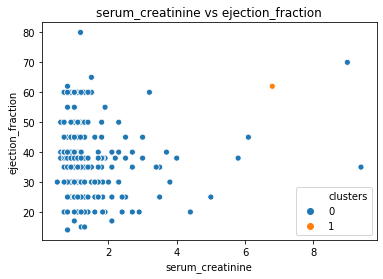

In [119]:
data['clusters'] = clusters - 1
ax = sns.scatterplot(data=data, x=col1, y=col2, hue='clusters')
ax.set(title = '{} vs {}'.format(col1, col2), xlabel = col1, ylabel = col2)

### 5.1.2: Using Age and Gender Variables

In [120]:
selected_predictor_variables = ['age', 
                                'sex']
x = x_train_scaled_df.loc[:, selected_predictor_variables].to_numpy()

In [121]:
clustering = linkage(x, method="single", metric = "euclidean")
clusters = fcluster(clustering, 2, criterion = 'maxclust')

In [122]:
adjusted_rand_index = metrics.adjusted_rand_score(y_train, clusters)
silhouette_coefficient = metrics.silhouette_score(x, clusters, metric = "euclidean")
print([adjusted_rand_index, silhouette_coefficient])

[-0.0018582102712868956, 0.551937322742283]


[Text(0, 0.5, 'ejection_fraction'),
 Text(0.5, 0, 'serum_creatinine'),
 Text(0.5, 1.0, 'serum_creatinine vs ejection_fraction')]

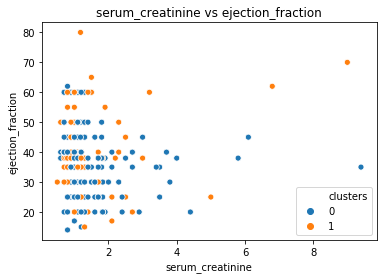

In [123]:
data['clusters'] = clusters - 1
ax = sns.scatterplot(data=data, x=col1, y=col2, hue='clusters')
ax.set(title = '{} vs {}'.format(col1, col2), xlabel = col1, ylabel = col2)

### 5.1.3: Using Health Problem Variables

In [124]:
selected_predictor_variables = ['anaemia', 
                                'diabetes',
                               'platelets', 'high_blood_pressure', 'smoking']
x = x_train_scaled_df.loc[:, selected_predictor_variables].to_numpy()

In [125]:
clustering = linkage(x, method="single", metric = "euclidean")
clusters = fcluster(clustering, 2, criterion = 'maxclust')

In [126]:
adjusted_rand_index = metrics.adjusted_rand_score(y_train, clusters)
silhouette_coefficient = metrics.silhouette_score(x, clusters, metric = "euclidean")
print([adjusted_rand_index, silhouette_coefficient])

[-0.0035189759889497152, 0.5427711036936387]


[Text(0, 0.5, 'ejection_fraction'),
 Text(0.5, 0, 'serum_creatinine'),
 Text(0.5, 1.0, 'serum_creatinine vs ejection_fraction')]

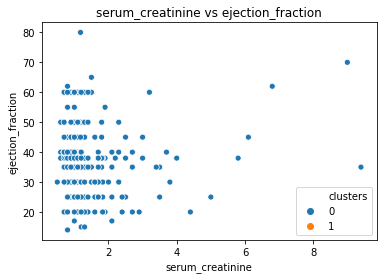

In [127]:
data['clusters'] = clusters - 1
ax = sns.scatterplot(data=data, x=col1, y=col2, hue='clusters')
ax.set(title = '{} vs {}'.format(col1, col2), xlabel = col1, ylabel = col2)

### 5.1.4: Using Body Parameter Variables

In [128]:
selected_predictor_variables = ['creatinine_phosphokinase', 
                                'serum_creatinine',
                               'serum_sodium',
                               'ejection_fraction']
x = x_train_scaled_df.loc[:, selected_predictor_variables].to_numpy()

In [129]:
clustering = linkage(x, method="single", metric = "euclidean")
clusters = fcluster(clustering, 2, criterion = 'maxclust')

In [130]:
adjusted_rand_index = metrics.adjusted_rand_score(y_train, clusters)
silhouette_coefficient = metrics.silhouette_score(x, clusters, metric = "euclidean")
print([adjusted_rand_index, silhouette_coefficient])

[0.007441167976633384, 0.6662613003976123]


[Text(0, 0.5, 'ejection_fraction'),
 Text(0.5, 0, 'serum_creatinine'),
 Text(0.5, 1.0, 'serum_creatinine vs ejection_fraction')]

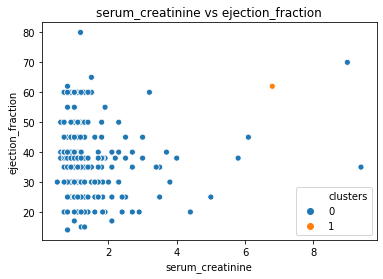

In [131]:
data['clusters'] = clusters - 1
ax = sns.scatterplot(data=data, x=col1, y=col2, hue='clusters')
ax.set(title = '{} vs {}'.format(col1, col2), xlabel = col1, ylabel = col2)

### 5.1.5: Using Anaemia

In [132]:
selected_predictor_variables = ['anaemia']
x = x_train_scaled_df.loc[:, selected_predictor_variables].to_numpy()

In [133]:
clustering = linkage(x, method="single", metric = "euclidean")
clusters = fcluster(clustering, 2, criterion = 'maxclust')

In [134]:
adjusted_rand_index = metrics.adjusted_rand_score(y_train, clusters)
silhouette_coefficient = metrics.silhouette_score(x, clusters, metric = "euclidean")
print([adjusted_rand_index, silhouette_coefficient])

[0.006938789172657143, 1.0]


[Text(0, 0.5, 'ejection_fraction'),
 Text(0.5, 0, 'serum_creatinine'),
 Text(0.5, 1.0, 'serum_creatinine vs ejection_fraction')]

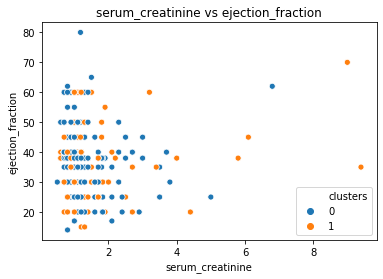

In [135]:
data['clusters'] = clusters - 1
ax = sns.scatterplot(data=data, x=col1, y=col2, hue='clusters')
ax.set(title = '{} vs {}'.format(col1, col2), xlabel = col1, ylabel = col2)

## 2) Hierarchical Clustering - Complete Linkage

### 5.2.1 All variables

In [136]:
all_x = x_train_scaled_df.to_numpy()

In [137]:
clustering = linkage(all_x, method="complete", metric = "euclidean")
clusters = fcluster(clustering, 2, criterion = 'maxclust')

In [138]:
adjusted_rand_index = metrics.adjusted_rand_score(y_train, clusters)
silhouette_coefficient = metrics.silhouette_score(all_x, clusters, metric = "euclidean")
print([adjusted_rand_index, silhouette_coefficient])

[0.022507236951381675, 0.46861144710828245]


[Text(0, 0.5, 'ejection_fraction'),
 Text(0.5, 0, 'serum_creatinine'),
 Text(0.5, 1.0, 'serum_creatinine vs ejection_fraction')]

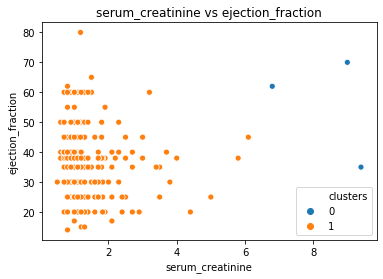

In [139]:
data['clusters'] = clusters - 1
ax = sns.scatterplot(data=data, x=col1, y=col2, hue='clusters')
ax.set(title = '{} vs {}'.format(col1, col2), xlabel = col1, ylabel = col2)

### 5.2.2: Using Age and Gender Variables

In [140]:
selected_predictor_variables = ['age', 
                                'sex']
x = x_train_scaled_df.loc[:, selected_predictor_variables].to_numpy()

In [141]:
clustering = linkage(x, method="complete", metric = "euclidean")
clusters = fcluster(clustering, 2, criterion = 'maxclust')

In [142]:
adjusted_rand_index = metrics.adjusted_rand_score(y_train, clusters)
silhouette_coefficient = metrics.silhouette_score(x, clusters, metric = "euclidean")
print([adjusted_rand_index, silhouette_coefficient])

[0.11142775349398941, 0.3419871555832537]


[Text(0, 0.5, 'ejection_fraction'),
 Text(0.5, 0, 'serum_creatinine'),
 Text(0.5, 1.0, 'serum_creatinine vs ejection_fraction')]

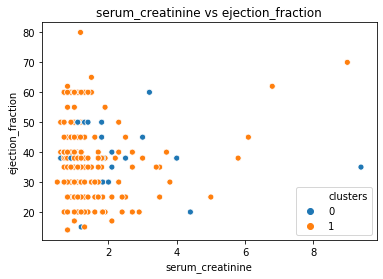

In [143]:
data['clusters'] = clusters - 1
ax = sns.scatterplot(data=data, x=col1, y=col2, hue='clusters')
ax.set(title = '{} vs {}'.format(col1, col2), xlabel = col1, ylabel = col2)

### 5.2.3: Using Health Problem Variables

In [144]:
selected_predictor_variables = ['anaemia', 
                                'diabetes',
                               'platelets', 'high_blood_pressure', 'smoking']
x = x_train_scaled_df.loc[:, selected_predictor_variables].to_numpy()

In [145]:
clustering = linkage(x, method="complete", metric = "euclidean")
clusters = fcluster(clustering, 2, criterion = 'maxclust')

In [146]:
adjusted_rand_index = metrics.adjusted_rand_score(y_train, clusters)
silhouette_coefficient = metrics.silhouette_score(x, clusters, metric = "euclidean")
print([adjusted_rand_index, silhouette_coefficient])

[-0.007387031337951726, 0.11014816465932352]


[Text(0, 0.5, 'ejection_fraction'),
 Text(0.5, 0, 'serum_creatinine'),
 Text(0.5, 1.0, 'serum_creatinine vs ejection_fraction')]

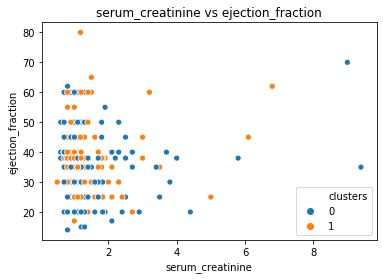

In [147]:
data['clusters'] = clusters - 1
ax = sns.scatterplot(data=data, x=col1, y=col2, hue='clusters')
ax.set(title = '{} vs {}'.format(col1, col2), xlabel = col1, ylabel = col2)

### 5.2.4: Using Body Parameter Variables

In [148]:
selected_predictor_variables = ['creatinine_phosphokinase', 
                                'serum_creatinine',
                               'serum_sodium',
                               'ejection_fraction']
x = x_train_scaled_df.loc[:, selected_predictor_variables].to_numpy()

In [149]:
clustering = linkage(x, method="complete", metric = "euclidean")
clusters = fcluster(clustering, 2, criterion = 'maxclust')

In [150]:
adjusted_rand_index = metrics.adjusted_rand_score(y_train, clusters)
silhouette_coefficient = metrics.silhouette_score(x, clusters, metric = "euclidean")
print([adjusted_rand_index, silhouette_coefficient])

[0.02612613619798278, 0.6567989004211781]


[Text(0, 0.5, 'ejection_fraction'),
 Text(0.5, 0, 'serum_creatinine'),
 Text(0.5, 1.0, 'serum_creatinine vs ejection_fraction')]

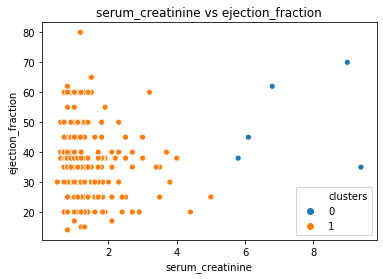

In [151]:
data['clusters'] = clusters - 1
ax = sns.scatterplot(data=data, x=col1, y=col2, hue='clusters')
ax.set(title = '{} vs {}'.format(col1, col2), xlabel = col1, ylabel = col2)

### 5.2.5: Using Anaemia

In [152]:
selected_predictor_variables = ['anaemia']
x = x_train_scaled_df.loc[:, selected_predictor_variables].to_numpy()

In [153]:
clustering = linkage(x, method="complete", metric = "euclidean")
clusters = fcluster(clustering, 2, criterion = 'maxclust')

In [154]:
adjusted_rand_index = metrics.adjusted_rand_score(y_train, clusters)
silhouette_coefficient = metrics.silhouette_score(x, clusters, metric = "euclidean")
print([adjusted_rand_index, silhouette_coefficient])

[0.006938789172657143, 1.0]


[Text(0, 0.5, 'ejection_fraction'),
 Text(0.5, 0, 'serum_creatinine'),
 Text(0.5, 1.0, 'serum_creatinine vs ejection_fraction')]

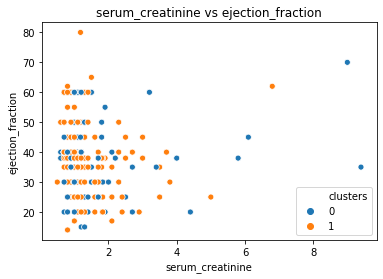

In [155]:
data['clusters'] = clusters - 1
ax = sns.scatterplot(data=data, x=col1, y=col2, hue='clusters')
ax.set(title = '{} vs {}'.format(col1, col2), xlabel = col1, ylabel = col2)

## 3) KMeans Clustering

### 5.3.1: All variables

In [156]:
all_x = x_train_scaled_df.to_numpy()

In [157]:
clustering = KMeans(n_clusters = 2, init = 'random', n_init = 10, random_state=0).fit(all_x)
clusters = clustering.labels_

In [158]:
adjusted_rand_index = metrics.adjusted_rand_score(y_train, clusters)
silhouette_coefficient = metrics.silhouette_score(all_x, clusters, metric = "euclidean")
print([adjusted_rand_index, silhouette_coefficient])

[-0.0036799581865726927, 0.1178512561512019]


[Text(0, 0.5, 'ejection_fraction'),
 Text(0.5, 0, 'serum_creatinine'),
 Text(0.5, 1.0, 'serum_creatinine vs ejection_fraction')]

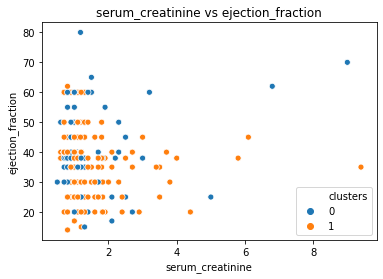

In [159]:
data['clusters'] = clusters
ax = sns.scatterplot(data=data, x=col1, y=col2, hue='clusters')
ax.set(title = '{} vs {}'.format(col1, col2), xlabel = col1, ylabel = col2)

### 5.3.2 Using Age and Gender Variables

In [160]:
selected_predictor_variables = ['age', 
                                'sex']
x = x_train_scaled_df.loc[:, selected_predictor_variables].to_numpy()

In [161]:
clustering = KMeans(n_clusters = 2, init = 'random', n_init = 10, random_state=0).fit(x)
clusters = clustering.labels_

In [162]:
adjusted_rand_index = metrics.adjusted_rand_score(y_train, clusters)
silhouette_coefficient = metrics.silhouette_score(x, clusters, metric = "euclidean")
print([adjusted_rand_index, silhouette_coefficient])

[-0.0018582102712868956, 0.551937322742283]


[Text(0, 0.5, 'ejection_fraction'),
 Text(0.5, 0, 'serum_creatinine'),
 Text(0.5, 1.0, 'serum_creatinine vs ejection_fraction')]

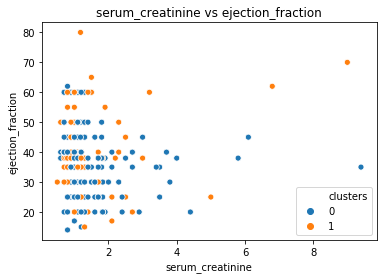

In [163]:
data['clusters'] = clusters
ax = sns.scatterplot(data=data, x=col1, y=col2, hue='clusters')
ax.set(title = '{} vs {}'.format(col1, col2), xlabel = col1, ylabel = col2)

### 5.3.3 Using Health Problem Variables

In [164]:
selected_predictor_variables = ['anaemia', 
                                'diabetes',
                               'platelets', 'high_blood_pressure', 'smoking']
x = x_train_scaled_df.loc[:, selected_predictor_variables].to_numpy()

In [165]:
clustering = KMeans(n_clusters = 2, init = 'random', n_init = 10, random_state=0).fit(x)
clusters = clustering.labels_

In [166]:
adjusted_rand_index = metrics.adjusted_rand_score(y_train, clusters)
silhouette_coefficient = metrics.silhouette_score(x, clusters, metric = "euclidean")
print([adjusted_rand_index, silhouette_coefficient])

[-0.005350592860670945, 0.24587001478483037]


[Text(0, 0.5, 'ejection_fraction'),
 Text(0.5, 0, 'serum_creatinine'),
 Text(0.5, 1.0, 'serum_creatinine vs ejection_fraction')]

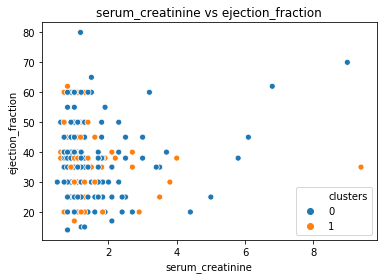

In [167]:
data['clusters'] = clusters
ax = sns.scatterplot(data=data, x=col1, y=col2, hue='clusters')
ax.set(title = '{} vs {}'.format(col1, col2), xlabel = col1, ylabel = col2)

### 5.3.4 Using Body Parameter Variables

In [168]:
selected_predictor_variables = ['creatinine_phosphokinase', 
                                'serum_creatinine',
                               'serum_sodium',
                               'ejection_fraction']
x = x_train_scaled_df.loc[:, selected_predictor_variables].to_numpy()

In [169]:
clustering = KMeans(n_clusters = 2, init = 'random', n_init = 10, random_state=0).fit(x)
clusters = clustering.labels_

In [170]:
adjusted_rand_index = metrics.adjusted_rand_score(y_train, clusters)
silhouette_coefficient = metrics.silhouette_score(x, clusters, metric = "euclidean")
print([adjusted_rand_index, silhouette_coefficient])

[0.15419143591523968, 0.24027667508494274]


[Text(0, 0.5, 'ejection_fraction'),
 Text(0.5, 0, 'serum_creatinine'),
 Text(0.5, 1.0, 'serum_creatinine vs ejection_fraction')]

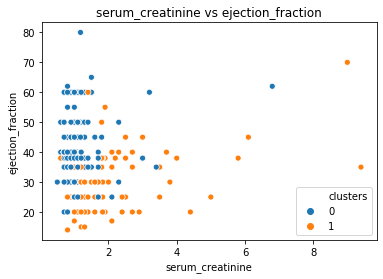

In [171]:
data['clusters'] = clusters
ax = sns.scatterplot(data=data, x=col1, y=col2, hue='clusters')
ax.set(title = '{} vs {}'.format(col1, col2), xlabel = col1, ylabel = col2)

### 5.3.5 Using Anaemia

In [172]:
selected_predictor_variables = ['anaemia']
x = x_train_scaled_df.loc[:, selected_predictor_variables].to_numpy()

In [173]:
clustering = KMeans(n_clusters = 2, init = 'random', n_init = 10, random_state=0).fit(x)
clusters = clustering.labels_

In [174]:
adjusted_rand_index = metrics.adjusted_rand_score(y_train, clusters)
silhouette_coefficient = metrics.silhouette_score(x, clusters, metric = "euclidean")
print([adjusted_rand_index, silhouette_coefficient])

[0.006938789172657143, 1.0]


[Text(0, 0.5, 'ejection_fraction'),
 Text(0.5, 0, 'serum_creatinine'),
 Text(0.5, 1.0, 'serum_creatinine vs ejection_fraction')]

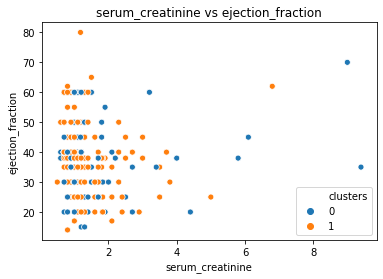

In [175]:
data['clusters'] = clusters
ax = sns.scatterplot(data=data, x=col1, y=col2, hue='clusters')
ax.set(title = '{} vs {}'.format(col1, col2), xlabel = col1, ylabel = col2)

### Classification: Model Performances
* **Hierarchical Clustering - Single Linkage**

|    Variables    | Rand Index | Silhouette Coefficient |
|:---------------:|:----------:|:----------------------:|
|       All       |    0.007   |          0.416         |
|   Age & Gender  |   -0.001   |          0.552         |
|  Health Problem |   -0.003   |          0.543         |
| Body Parameters |    0.007   |          0.666         |
|     Anaemia     |    0.007   |           1.0          |

* **Hierarchical Clustering - Complete Linkage**

|    Variables    | Rand Index | Silhouette Coefficient |
|:---------------:|:----------:|:----------------------:|
|       All       |    0.022   |          0.469         |
|   Age & Gender  |    0.111   |          0.342         |
|  Health Problem |   -0.007   |          0.11          |
| Body Parameters |    0.026   |          0.657         |
|     Anaemia     |    0.007   |           1.0          |

* **KMeans Clustering** 

|    Variables    | Rand Index | Silhouette Coefficient |
|:---------------:|:----------:|:----------------------:|
|       All       |   -0.003   |          0.117         |
|   Age & Gender  |   -0.001   |          0.552         |
|  Health Problem |   -0.005   |          0.246         |
| Body Parameters |    0.154   |          0.240         |
|     Anaemia     |    0.007   |           1.0          |